## Importing packages, files and inspecting

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
telco = pd.read_csv('Churn.csv')

In [3]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
telco.shape

(3333, 21)

Checking for NaNs:

In [5]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [6]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

There are 483 churners and 2850 non churners in dataset

Looking for data types:

In [7]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

Lets start with features that are objects:

In [8]:
telco.loc[:, telco.dtypes == 'object'].head()

,Churn,Intl_Plan,Vmail_Plan,State,Phone
0,no,no,yes,KS,382-4657
1,no,no,yes,OH,371-7191
2,no,no,no,NJ,358-1921
3,no,yes,no,OH,375-9999
4,no,yes,no,OK,330-6626


So we can transform features "Churn", "Intl_Plan" and "Vmail_Plan" to 0s and 1s, for State we can LabelEncode it and Phones we can drop as they will be useless.

In [9]:
telco['Churn'] =  LabelEncoder().fit_transform(telco.Churn)
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco.Intl_Plan)
telco['Vmail_Plan'] = LabelEncoder().fit_transform(telco.Vmail_Plan)
telco['State_encoded'] = LabelEncoder().fit_transform(telco.State)
telco.drop(columns='Phone', axis=1, inplace=True)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,State_encoded
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,16
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,35
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,31
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,35
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,36


Now that all variables are transformed to numeric information, we can take a look at their statistics:

In [10]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Vmail_Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day_Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Eve_Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Night_Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
Intl_Mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
CustServ_Calls,3333.0,1.562856,1.315491,0.00,1.00,1.00,2.00,9.00
Churn,3333.0,0.144914,0.352067,0.00,0.00,0.00,0.00,1.00
Intl_Plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Vmail_Plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00


So we can observe all statistics, like minimum values, maximum values, means, standard deviations, medians, etc

## Data Visualization

Lets look at the correlations between these features:

In [11]:
corr = telco.corr()

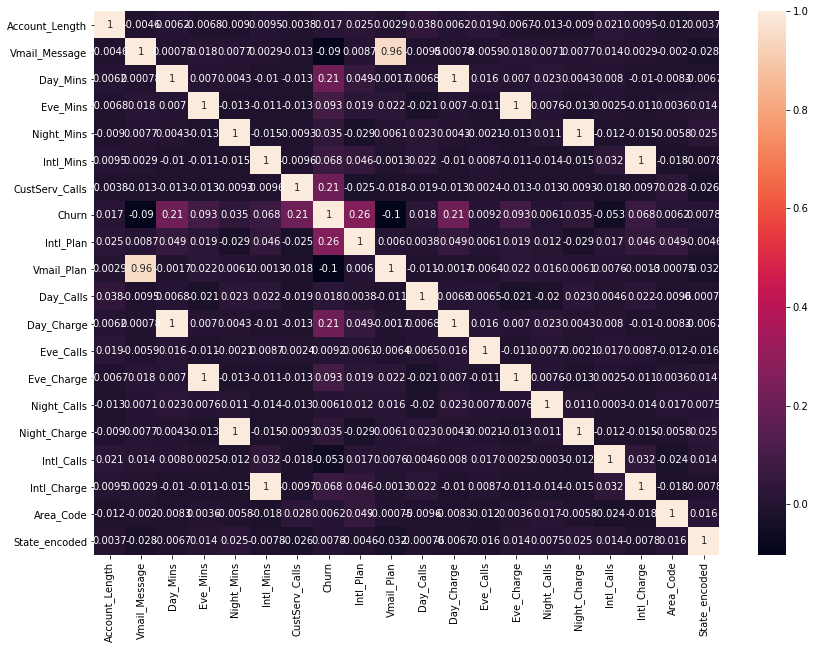

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)

So Day_Charge and Day_Mins, as Eve_Charge and Eve_Mins, as Night_Charge and Night_Mins, as Intl_Charge and Intl_Mins are all 100% correlated and won´t bring any new information to modeling. So we can take these off (a few lines below).
Besides Vmail_Plan and Vmail_Message have 0.96 correlation and we will do the same. We also can observe that the feature Churn has better correlation with the features Day_Mins, CustServ_Calls, Intl_Plan, Eve_Mins and Intl_Mins, which suggests that customers that churn are most likely more heavy users and makes more calls to customer service. In the other hand, Vmail_Plan inverse correlation suggests that customers that have the voice mail plan associated are less likely to churn, probably not to lose the messages saved, and indicating the power of cross-selling in customer loyalty.

Now, lets look at the features that look like the most important ones versus the Churn feature:

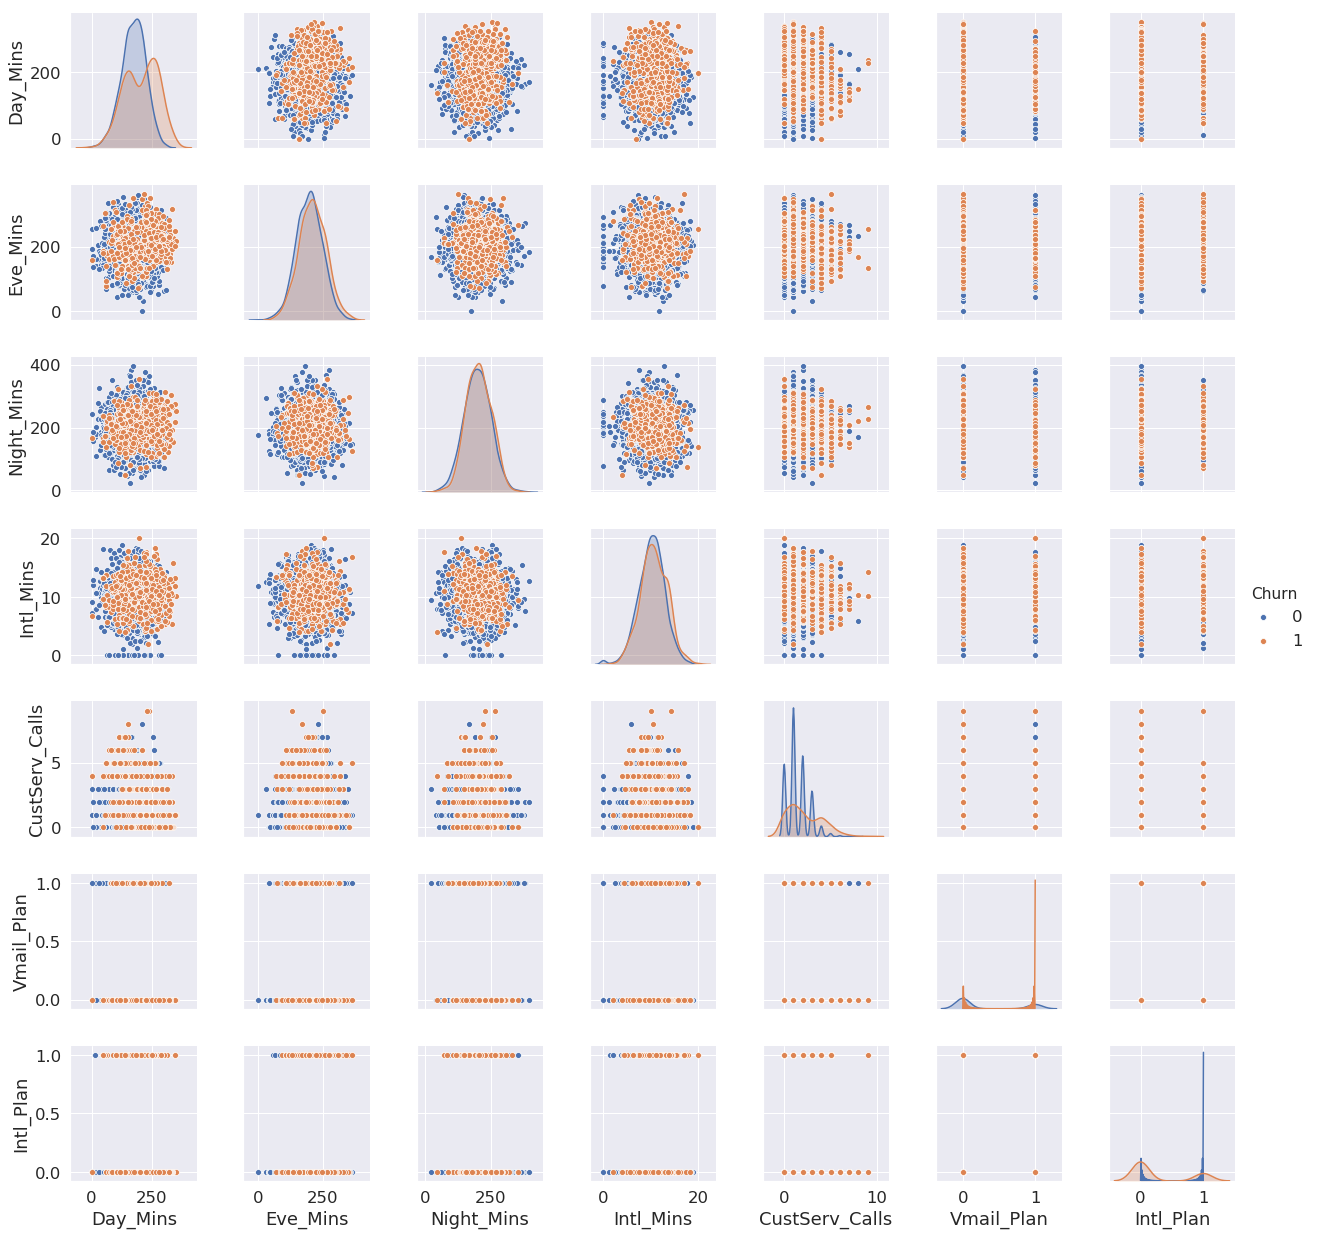

In [13]:
sns.set(font_scale=1.5)
sns.pairplot(telco, vars = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls',
                            'Vmail_Plan', 'Intl_Plan'], hue='Churn')

From the plot, we can observe that churners are more frequent in higher minutages for Day_Mins. Also we can observe that the Day_Mins is not a normal distribution with 2 peaks (different from the others and from non churners). We can also observe that the CustServ_Calls feature has very different distributions for churners and non churners, as well as Intl_Plan, and this is a good indication that both can be good predictors of Churn phenomenon.

## Feature Engineering

Lets create some new features to help the model effort:

In [14]:
telco['Day_cost'] = telco.Day_Charge / telco.Day_Mins
telco['Eve_cost'] = telco.Eve_Charge / telco.Eve_Mins
telco['Night_cost'] = telco.Night_Charge / telco.Night_Mins
telco['Intl_cost'] = telco.Intl_Charge / telco.Intl_Mins

In [15]:
telco.drop(columns=['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge',
                    'Vmail_Message', 'State'], axis=1, inplace=True)

In [16]:
telco['Total_Mins'] = telco.Day_Mins + telco.Eve_Mins + telco.Night_Mins + telco.Intl_Mins
telco['Total_Calls'] = telco.Day_Calls + telco.Eve_Calls + telco.Night_Calls + telco.Intl_Calls
telco['Day_call_duration'] = telco.Day_Mins / telco.Day_Calls
telco['Eve_call_duration'] = telco.Eve_Mins / telco.Eve_Calls
telco['Night_call_duration'] = telco.Night_Mins / telco.Night_Calls
telco['Intl_call_duration'] = telco.Intl_Mins / telco.Intl_Calls

In [17]:
telco['Day_share'] = telco.Day_Mins / telco.Total_Mins
telco['Eve_share'] = telco.Eve_Mins / telco.Total_Mins
telco['Night_share'] = telco.Night_Mins / telco.Total_Mins
telco['Intl_share'] = telco.Intl_Mins / telco.Total_Mins

Before running the model, we can split the train and test datasets to create the mean encodings which are powerful features. And also this way we can assure there is no data leakage from test dataset to train dataset, which would harm our model´s ability to generalize. In the end we concat them again just to split in new train and test sets below.

In [18]:
train, test = train_test_split(telco, test_size=0.2, random_state=21)

In [19]:
x1 = train.groupby('State_encoded').Churn.mean()
x2 = train.groupby('CustServ_Calls').Churn.mean()
x3 = train.groupby('Vmail_Plan').Churn.mean()
x4 = train.groupby('Area_Code').Churn.mean()
x5 = train.groupby('Intl_Plan').Churn.mean()

train['State_mean'] = train.loc[:, 'State_encoded'].map(x1)
train['CustServ_Calls_mean'] = train.loc[:, 'CustServ_Calls'].map(x2)
train['Vmail_Plan_mean'] = train.loc[:, 'Vmail_Plan'].map(x3)
train['Area_Code_mean'] = train.loc[:, 'Area_Code'].map(x4)
train['Intl_Plan_mean'] = train.loc[:, 'Intl_Plan'].map(x5)

test['State_mean'] = test.loc[:, 'State_encoded'].map(x1)
test['CustServ_Calls_mean'] = test.loc[:, 'CustServ_Calls'].map(x2)
test['Vmail_Plan_mean'] = test.loc[:, 'Vmail_Plan'].map(x3)
test['Area_Code_mean'] = test.loc[:, 'Area_Code'].map(x4)
test['Intl_Plan_mean'] = test.loc[:, 'Intl_Plan'].map(x5)

data = pd.concat([train, test], ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [20]:
data.fillna(0, inplace=True)

## Modeling

First lets split the train and test sets:

In [21]:
y = data.Churn
X = data
X.drop(columns='Churn', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

And lets train a Random Forest Classifier to help predict churn:

In [22]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', min_samples_split=20,
                             max_depth=10, verbose=1, random_state=32, class_weight='balanced')

In [23]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=32, verbose=1, warm_start=False)

In [24]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Plotting the confusion matrix:

In [25]:
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(cm)

[[564   8]
 [ 18  77]]


So we have 8 false negatives (ones that we are saying that are non churners and are in fact) and 18 false positives (ones that are non churners but we are saying that are churners).

In [27]:
print(f1_score(y_pred, y_test))

0.8555555555555556


We have a 0.855 f1_score which is a combination of recall and precision. And we can plot the ROC Curve to have an idea of how good is our estimator:

In [28]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


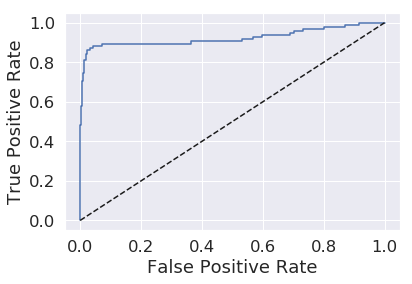

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0, 1], "k--")
plt.show()

In [30]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8982701509017298


So our model has an area under curve of 0.89 which is also an indicator of a very good model.

At last, lets understand the features importances:

In [31]:
importances = rf.feature_importances_

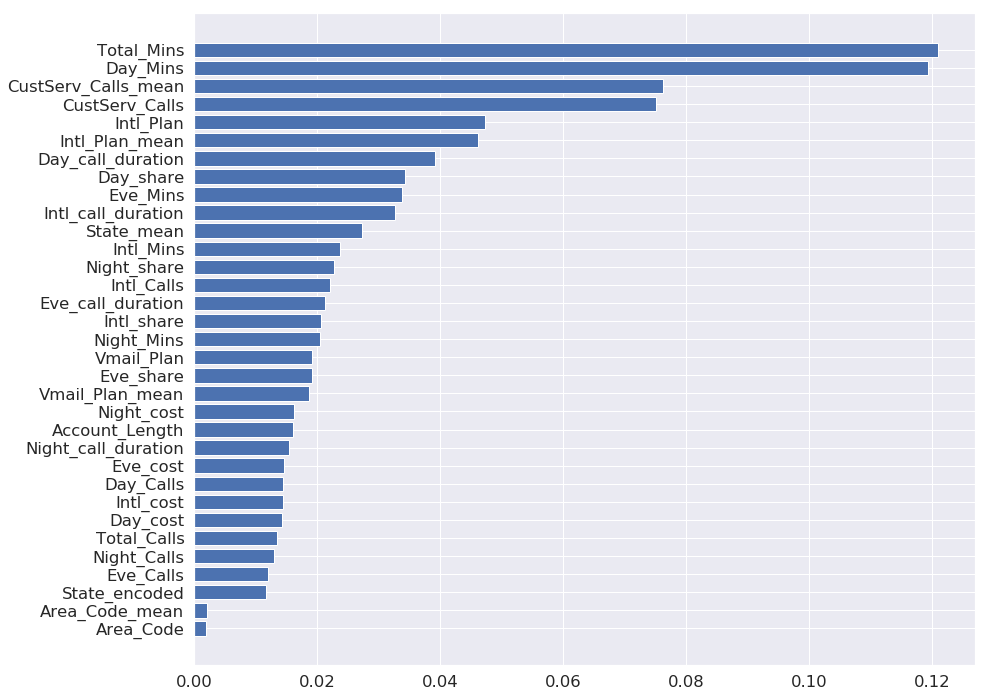

In [32]:
plt.figure(figsize=(14,12))

#Sorting index importances
sorted_index = np.argsort(importances)

#Creating the labels
labels = X_train.columns[sorted_index]

#Creating the plot
plt.barh(range(X_train.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

## Business Considerations

From the most important features, Total_Mins, Day_Mins, we can conclude that the heavier users of this company are the customers at most risk of churn. And also that calling to Customer Service can help as a good predictor of churn, probably because the customer reported some problem before that was not solved or any other circumstance.
The overall prediction for the modeling done was good enough given that we achieved 96% accuracy over test set samples, a 85% f1_score and a Area Under Curve of 0.89. 

We could further improve this results adding other sources of information like :  
1) signal sources  
2) Other information from Customer Service (like reasons for calling, duration of each calling, satisfaction level, etc)  
3) Other transactions  
4) Information from marketing campaigns (ads interaction, emails opened or not opened, etc)  
5) Information from social media (Facebook, Twitter, etc)  
6) Other known telecom services used (interconnection information, other products and services, etc)  
7) Customer demographics  
8) Billing and payment behaviors  
9) Greater historic of data
10) etc  

Basically, from the most important features we can derive a few actions (or at least start initiatives to test them in a A/B test probably) related to the greater value clients and trying to pay more attention to customer touchpoint with Customer Service. Maybe we could think of a few options to test and understand like: 

1) to subsidize phone devices to the potential churners  
2) to give discount on their charges  
3) to offer aditional services (as we saw that voice mail has a negative correlation, potentially a cross selling strategy  could diminish the willing to churn)  
4) to gain more depth in customer needs understanding (maybe doing some researches with these potential churners)  
5) trying to give discounts in 1 specific service (for clusters where it makes sense) like international calls  
6) creating a call center branch for this segment (potential churners)  
7) improving customer services  
8) improving overall signal quality  
9) Etc  

At last it is very important to consider in the business / financial modeling, that a false positive is a customer that it is not a churner but we are predicting that he is, so we would spend company value to retain this client and avoid its churn (if we conclude individually that this customer LTV (Lifetime Value) is greather than the cost of his retention).
Besides for the false negatives, we won´t be making any efforts and we will lose these clients (because they are churners and we are treating them as not). So both effects must be taken in consideration when we are designing a strategy to minimize churn business effects. And maybe this could lead to a model revision that could propitiate better business economics.